# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train['CNT_CHILDREN'].value_counts()

Path of read in data: ./data/application_train.csv


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

Pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)

用途：返回 x 中的每一個數據 在bins 中對應 的範圍
引數：
#x ： 必須是一維資料
#bins： 不同面元（不同範圍）型別:整數，序列如陣列, 和IntervalIndex
#right： 最後一個bins是否包含最右邊的資料，預設為True
#precision：精度 預設保留三位小數
#retbins： 即return bins 是否返回每一個bins的範圍 預設為False

In [4]:
#1
"""
Your code here
"""
cut_rule = [0, 1, 2, 3, 5, 6, app_train['CNT_CHILDREN'].max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, right=False)

app_train['CNT_CHILDREN_GROUP'].value_counts()

[0, 1)     215371
[1, 2)      61119
[2, 3)      26749
[3, 5)       4146
[5, 6)         84
[6, 19)        40
Name: CNT_CHILDREN_GROUP, dtype: int64

In [13]:
#2-1
gp = app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL']
gp.mean()

CNT_CHILDREN_GROUP  TARGET
[0, 1)              0         166747.010980
                    1         160804.210548
[1, 2)              0         175008.249905
                    1         182361.980198
[2, 3)              0         173638.366582
                    1         161512.254393
[3, 5)              0         175057.123091
                    1         159848.673123
[5, 6)              0         174889.870130
                    1         209571.428571
[6, 19)             0         140879.032258
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

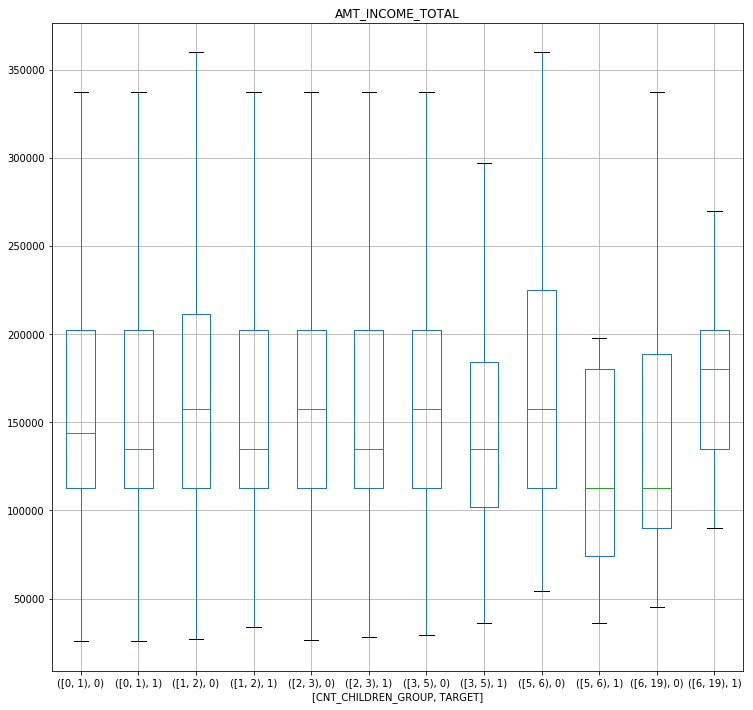

In [10]:
#2-2

plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [15]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

def z_transform(x):
    x = (x - np.mean(x)) / np.std(x)
    return x

#def range_0_1_transform(x):
#    x = (x - np.min(x)) / (np.max(x) - np.min(x))
#    return x

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = gp.apply(lambda x: z_transform(x))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136
